In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.metrics import accuracy_score

def loadDataSet(fileName):
    dataMat = []; labelMat = []
    with open(fileName) as fr:
        for line in fr.readlines():
            lineArr = line.strip().split('\t')
            dataMat.append([float(lineArr[0]), float(lineArr[1])])
            labelMat.append(float(lineArr[2]))
    return np.array(dataMat), np.array(labelMat)

def img2vector(filename):
    returnVect = np.zeros((1,1024))
    with open(filename) as fr:
        for i in range(32):
            lineStr = fr.readline()
            for j in range(32):
                returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

def loadImages(dirName):
    hwLabels = []
    trainingFileList = os.listdir(dirName)
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        # 将问题定义为二分类
        if classNumStr == 9: 
            hwLabels.append(-1)
        else: 
            hwLabels.append(1)
        trainingMat[i,:] = img2vector('%s/%s' % (dirName, fileNameStr))
    return trainingMat, np.array(hwLabels)

In [30]:
X_linear, y_linear = loadDataSet('testSet.txt')
print(f"线性数据集testSet.txt数据维度: {X_linear.shape}")

X_rbf_train, y_rbf_train = loadDataSet('testSetRBF.txt')
X_rbf_test, y_rbf_test = loadDataSet('testSetRBF2.txt')
print(f"RBF训练集testSetRBF.txt数据维度: {X_rbf_train.shape}")
print(f"RBF测试集testSetRBF2.txt数据维度: {X_rbf_test.shape}")

X_train_digits, y_train_digits = loadImages('digits/trainingDigits')
print(f"手写数字训练数据维度: {X_train_digits.shape}")

X_test_digits, y_test_digits = loadImages('digits/testDigits')
print(f"手写数字测试数据维度: {X_test_digits.shape}")

线性数据集testSet.txt数据维度: (100, 2)
RBF训练集testSetRBF.txt数据维度: (100, 2)
RBF测试集testSetRBF2.txt数据维度: (100, 2)
手写数字训练数据维度: (402, 1024)
手写数字测试数据维度: (186, 1024)


In [32]:
def print_digit(vector):
    matrix = vector.reshape(32, 32)
    for row in matrix:
        print(''.join(['#' if pixel > 0 else '.' for pixel in row]))

print("目测分析:打印一个非'9'的数字样本，标签为 1:")
print_digit(X_train_digits[0])

nine_index = np.where(y_train_digits == -1)[0][0]
print("\n目测分析:打印一个数字'9'的样本，标签为 -1:")
print_digit(X_train_digits[nine_index])

目测分析:打印一个非'9'的数字样本，标签为 1:
................####............
...............########.........
...............#########........
...............##########.......
...............##########.......
..............##########........
..............##########........
.............###########........
..............##########........
..............##########........
..............#########.........
.............##########.........
............###########.........
...........###########..........
..........#############.........
.......################.........
......################..........
.....#################..........
.....#################..........
.......###############..........
.......#######.#######..........
........####...#######..........
...............#######..........
...............######...........
..............########..........
...............#######..........
...............#######..........
...............########.........
...............########.........
...............##

线性核模型


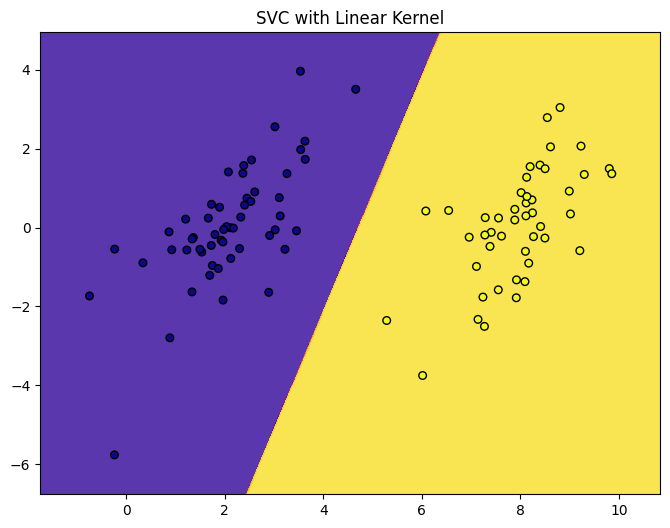

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

print("线性核模型")
clf_linear = svm.SVC(kernel='linear', C=1.0).fit(X_linear, y_linear)
fig, ax = plt.subplots(figsize=(8, 6))
xx, yy = make_meshgrid(X_linear[:, 0], X_linear[:, 1])
plot_contours(ax, clf_linear, xx, yy, cmap=plt.cm.plasma, alpha=0.8)
ax.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap=plt.cm.plasma, s=30, edgecolors='k')
ax.set_title('SVC with Linear Kernel') #testSet.txt
plt.show()


不同gamma参数的RBF核模型


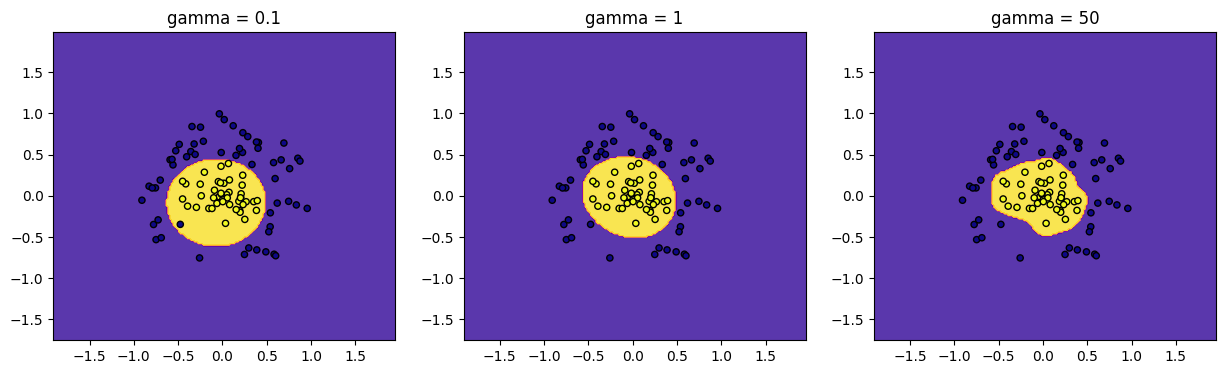

In [36]:
print("\n不同gamma参数的RBF核模型")
C = 200.0
models = (svm.SVC(kernel='rbf', gamma=0.1, C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='rbf', gamma=50, C=C))
models = (clf.fit(X_rbf_train, y_rbf_train) for clf in models)
titles = ('gamma = 0.1', 'gamma = 1', 'gamma = 50')

fig, sub = plt.subplots(1, 3, figsize=(15, 4))
xx_rbf, yy_rbf = make_meshgrid(X_rbf_train[:, 0], X_rbf_train[:, 1])

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx_rbf, yy_rbf, cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X_rbf_train[:, 0], X_rbf_train[:, 1], c=y_rbf_train, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_title(title)
plt.show()

In [52]:
print("训练线性核模型")
linear_svm_digits = SVC(kernel='linear', C=200).fit(X_train_digits, y_train_digits)

print("\n训练RBF核模型 (gamma=0.001)")
rbf_svm_g001 = SVC(kernel='rbf', C=200, gamma=0.001).fit(X_train_digits, y_train_digits)
print("训练RBF核模型 (gamma=0.01)")
rbf_svm_g01 = SVC(kernel='rbf', C=200, gamma=0.01).fit(X_train_digits, y_train_digits)

训练线性核模型

训练RBF核模型 (gamma=0.001)
训练RBF核模型 (gamma=0.01)


In [53]:
def test_model(model, model_name, X_train, y_train, X_test, y_test):
    print(f"测试模型: {model_name} ")
    
    train_pred = model.predict(X_train)
    train_error = 1 - accuracy_score(y_train, train_pred)
    print(f"训练集错误率: {train_error:.4f}")

    test_pred = model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_pred)
    print(f"测试集错误率: {test_error:.4f}")
    print("-" * 30)

test_model(linear_svm_digits, "线性核", X_train_digits, y_train_digits, X_test_digits, y_test_digits)
test_model(rbf_svm_g001, "RBF核, gamma=0.001", X_train_digits, y_train_digits, X_test_digits, y_test_digits)
test_model(rbf_svm_g01, "RBF核, gamma=0.01", X_train_digits, y_train_digits, X_test_digits, y_test_digits)

测试模型: 线性核 
训练集错误率: 0.0000
测试集错误率: 0.0108
------------------------------
测试模型: RBF核, gamma=0.001 
训练集错误率: 0.0000
测试集错误率: 0.0108
------------------------------
测试模型: RBF核, gamma=0.01 
训练集错误率: 0.0000
测试集错误率: 0.0054
------------------------------
